In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.nn import Module
from torch.utils.data import Dataset
import sklearn.preprocessing as preprocessing
opts = {'batch_size': 32, 'loss_fun': nn.CrossEntropyLoss, 'optimizer_fun':optim.Adam, 'optimizer_opts':{'lr':0.001}}
#opts = {'batch_size': 64, 'loss_fun': nn.MSELoss, 'optimizer_fun':optim.SGD, 'optimizer_opts':{'lr':0.01, 'momentum':0.9}}

In [2]:
class MyDataset(Dataset):
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return (self.data[idx], self.labels[idx])

In [3]:
class Net1(Module):
    def __init__(self):
        super(Net1, self).__init__()
        self.conv1 = nn.Conv2d(1, 3, 3, padding=1)

        self.fc1 = nn.Linear(3 * 4 * 4, 24)
        self.fc2 = nn.Linear(24, 10)

    def forward(self, x):
        y = F.relu(self.conv1(x))
        y = F.max_pool2d(y, (2, 2))
        y = y.view(y.shape[0], -1)
        y = F.relu(self.fc1(y))
        y = self.fc2(y)
        return y

In [12]:
class Net2(Module):
    def __init__(self):
        super(Net2, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 3, padding=1)

        self.fc1 = nn.Linear(6 * 4 * 4, 32)
        self.fc2 = nn.Linear(32, 10)

    def forward(self, x):
        y = F.relu(self.conv1(x))
        y = F.max_pool2d(y, (2, 2))
        y = y.view(y.shape[0], -1)
        y = F.relu(self.fc1(y))
        y = self.fc2(y)
        return y

In [26]:
class Net3(Module):
    def __init__(self):
        super(Net3, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5, padding=4)
        self.conv2 = nn.Conv2d(6, 24, 5, padding=3)

        self.fc1 = nn.Linear(24 * 4 * 4, 100)
        self.fc2 = nn.Linear(100, 50)
        self.fc3 = nn.Linear(50, 10)

    def forward(self, x):
        y = F.relu(self.conv1(x))
        y = F.max_pool2d(y, (2, 2))
        y = F.relu(self.conv2(y))
        y = F.max_pool2d(y, (2, 2))
        y = y.view(y.shape[0], -1)
        y = F.relu(self.fc1(y))
        y = F.relu(self.fc2(y))
        y = self.fc3(y)
        return y

(8, 8)


<Figure size 640x480 with 0 Axes>

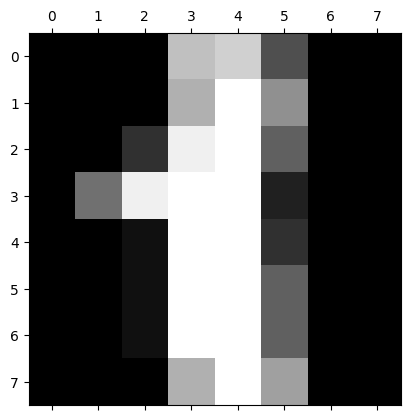

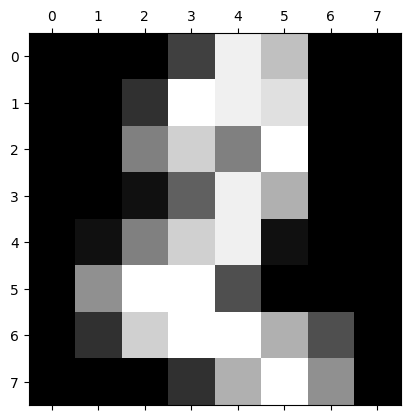

In [5]:
# Display images from the digits data set

# import some data to play with
digits = datasets.load_digits()

im = digits.images[1]
print(im.shape)
plt.gray()
plt.matshow(digits.images[1])
plt.matshow(digits.images[2])
plt.show()

In [6]:
# split the dataset into train, validation and test set (1-2r : r : r)
r = 0.2
numtotal = digits.images.shape[0]
num = int(numtotal * r)
idx = np.arange(numtotal)
np.random.shuffle(idx)
imagetrain = np.array(np.take(digits.images, idx[:-2*num], axis=0)[:, np.newaxis], dtype=np.float32)/16
imageval = np.array(np.take(digits.images, idx[-2*num:-num], axis=0)[:, np.newaxis], dtype=np.float32)/16
imagetest = np.array(np.take(digits.images, idx[-num:], axis=0)[:, np.newaxis], dtype=np.float32)/16
labeltraintmp = np.array(np.take(digits.target, idx[:-2*num], axis=0), dtype=np.float32)
labelval = np.array(np.take(digits.target, idx[-2*num:-num], axis=0), dtype=np.int8)
labeltest = np.array(np.take(digits.target, idx[-num:], axis=0), dtype=np.int8)
#
target = np.array([labeltraintmp]).T
ohe = preprocessing.OneHotEncoder().fit(target)
labeltrain = ohe.transform(target).toarray()

In [7]:
trainset = MyDataset(imagetrain, labeltrain)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=opts['batch_size'], shuffle=True, drop_last=True)

In [29]:
net1 = Net1()
criterion = opts["loss_fun"]()
optimizer = opts["optimizer_fun"](net1.parameters(), **opts["optimizer_opts"])
net1.train()
old_loss = []
for epoch in range(50):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net1(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() # Accumulate losses into running_loss
    print('[%d] loss: %.3f' %(epoch + 1, running_loss))
    old_loss.append(running_loss)
    if epoch > 2:
        if running_loss > 0.98 * (old_loss[epoch-3] + old_loss[epoch-2] + old_loss[epoch-1]) / 3:
            print('Finished Training')
            break

[1] loss: 75.919
[2] loss: 74.988
[3] loss: 73.334
[4] loss: 70.247
[5] loss: 65.319
[6] loss: 58.094
[7] loss: 49.353
[8] loss: 40.894
[9] loss: 33.504
[10] loss: 28.009
[11] loss: 23.973
[12] loss: 20.788
[13] loss: 18.386
[14] loss: 16.546
[15] loss: 15.178
[16] loss: 13.964
[17] loss: 12.773
[18] loss: 11.928
[19] loss: 11.340
[20] loss: 10.681
[21] loss: 10.287
[22] loss: 9.802
[23] loss: 9.364
[24] loss: 8.984
[25] loss: 8.871
[26] loss: 8.268
[27] loss: 7.974
[28] loss: 7.502
[29] loss: 7.429
[30] loss: 7.069
[31] loss: 6.935
[32] loss: 6.741
[33] loss: 6.514
[34] loss: 6.307
[35] loss: 6.003
[36] loss: 6.024
[37] loss: 5.857
[38] loss: 5.627
[39] loss: 5.353
[40] loss: 5.291
[41] loss: 5.190
[42] loss: 5.079
[43] loss: 4.957
[44] loss: 4.866
[45] loss: 4.734
[46] loss: 4.729
[47] loss: 4.400
[48] loss: 4.430
[49] loss: 4.318
[50] loss: 4.213


In [30]:
net1.eval()
with torch.no_grad():
    output = net1(torch.from_numpy(imageval)).numpy()
op = np.argmax(output, axis=1)
correct=0
for i in range(num):
    if op[i]==labelval[i]:
        correct +=1
print('Accuracy of the network 1 on the validation set: %d %%' % (
    100 * correct / num))

Accuracy of the network 1 on the validation set: 92 %


In [31]:
net2 = Net2()
criterion = opts["loss_fun"]()
optimizer = opts["optimizer_fun"](net2.parameters(), **opts["optimizer_opts"])
net2.train()
old_loss = []
for epoch in range(50):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net2(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() # Accumulate losses into running_loss
    print('[%d] loss: %.3f' %(epoch + 1, running_loss))
    old_loss.append(running_loss)
    if epoch > 2:
        if running_loss > 0.98 * (old_loss[epoch-3] + old_loss[epoch-2] + old_loss[epoch-1]) / 3:
            print('Finished Training')
            break

[1] loss: 75.567
[2] loss: 72.782
[3] loss: 67.829
[4] loss: 59.653
[5] loss: 48.756
[6] loss: 37.663
[7] loss: 28.600
[8] loss: 22.163
[9] loss: 18.021
[10] loss: 14.992
[11] loss: 12.991
[12] loss: 11.494
[13] loss: 10.300
[14] loss: 9.143
[15] loss: 8.531
[16] loss: 7.857
[17] loss: 7.368
[18] loss: 6.732
[19] loss: 6.344
[20] loss: 5.919
[21] loss: 5.864
[22] loss: 5.419
[23] loss: 5.076
[24] loss: 5.109
[25] loss: 4.618
[26] loss: 4.519
[27] loss: 4.290
[28] loss: 4.084
[29] loss: 3.733
[30] loss: 3.920
[31] loss: 3.653
[32] loss: 3.535
[33] loss: 3.437
[34] loss: 3.345
[35] loss: 3.181
[36] loss: 3.119
[37] loss: 3.005
[38] loss: 2.838
[39] loss: 2.749
[40] loss: 2.888
Finished Training


In [32]:
net2.eval()
with torch.no_grad():
    output = net2(torch.from_numpy(imageval)).numpy()
op = np.argmax(output, axis=1)
correct=0
for i in range(num):
    if op[i]==labelval[i]:
        correct +=1
print('Accuracy of the network 2 on the validation set: %d %%' % (
    100 * correct / num))

Accuracy of the network 2 on the validation set: 94 %


In [33]:
net3 = Net3()
criterion = opts["loss_fun"]()
optimizer = opts["optimizer_fun"](net3.parameters(), **opts["optimizer_opts"])
net3.train()
old_loss = []
for epoch in range(50):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net3(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() # Accumulate losses into running_loss
    print('[%d] loss: %.3f' %(epoch + 1, running_loss))
    old_loss.append(running_loss)
    if epoch > 2:
        if running_loss > 0.98 * (old_loss[epoch-3] + old_loss[epoch-2] + old_loss[epoch-1]) / 3:
            print('Finished Training')
            break

[1] loss: 75.158
[2] loss: 63.342
[3] loss: 39.319
[4] loss: 24.471
[5] loss: 16.345
[6] loss: 13.891
[7] loss: 11.224
[8] loss: 9.012
[9] loss: 8.213
[10] loss: 7.201
[11] loss: 6.770
[12] loss: 6.036
[13] loss: 5.197
[14] loss: 5.214
[15] loss: 4.160
[16] loss: 4.557
[17] loss: 3.884
[18] loss: 3.570
[19] loss: 4.156
Finished Training


In [34]:
net3.eval()
with torch.no_grad():
    output = net3(torch.from_numpy(imageval)).numpy()
op = np.argmax(output, axis=1)
correct=0
for i in range(num):
    if op[i]==labelval[i]:
        correct +=1
print('Accuracy of the network 3 on the validation set: %d %%' % (
    100 * correct / num))

Accuracy of the network 3 on the validation set: 93 %


In [35]:
net2.eval()
with torch.no_grad():
    output = net2(torch.from_numpy(imagetest)).numpy()
op = np.argmax(output, axis=1)
correct=0
for i in range(num):
    if op[i]==labeltest[i]:
        correct +=1
print('Accuracy of the network 2 on the test set: %d %%' % (
    100 * correct / num))

Accuracy of the network 2 on the test set: 96 %
